以下のプログラムは、100個の点をランダムに生成したものである。
点のx座標は変数Xに、y座標は変数Yにそれぞれ代入されている。

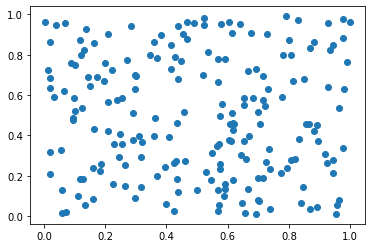

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 乱数の種を0にする
np.random.seed(0)
# 乱数を生成
X = np.random.rand(200)
Y = np.random.rand(200)
 # 散布図を描画
plt.scatter(X, Y)
plt.show()

## Prob1
X、YをDataFrameに変換しなさい。Xのカラムには「X」と、Yのカラムには「Y」と名前を付ける事。
なお、作成したDataFrameは変数dfに代入し、先頭の５行を表示すること。

In [3]:
# データをX,Yにし、転置する
data = np.array([X,Y]).T
# データをpandasに変換
import pandas as pd
df = pd.DataFrame(data=data,columns=["X","Y"])
df.head()

X         Y
0  0.548814  0.311796
1  0.715189  0.696343
2  0.602763  0.377752
3  0.544883  0.179604
4  0.423655  0.024679

## Prob2
k-means法を用いて、これらの点を4つの領域に分解しなさい。
なお、この時、KMeansクラスでの最大の演算回数は30回とすること。

In [4]:
# K-meansのインポート
from sklearn.cluster import KMeans
# K-meansによるクラスタリングの結果
model = KMeans(n_clusters=4, max_iter=30, init="random")
# 引数として説明変数を与える
model.fit(df.values)

KMeans(init='random', max_iter=30, n_clusters=4)

## Prob3
学習結果として得られたラベルを変数labelsに代入しなさい。

In [5]:
labels = model.labels_
labels

array([3, 2, 3, 3, 1, 3, 0, 3, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 2, 2, 2, 2,
       1, 2, 1, 2, 0, 3, 2, 0, 1, 3, 1, 3, 1, 3, 3, 3, 3, 2, 0, 1, 2, 1,
       2, 3, 0, 1, 1, 1, 3, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 3, 0, 0, 0,
       3, 0, 3, 1, 2, 0, 3, 2, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 1, 2, 1,
       3, 2, 1, 3, 0, 3, 1, 1, 3, 0, 2, 0, 2, 0, 3, 3, 1, 3, 3, 3, 0, 3,
       0, 3, 3, 1, 2, 1, 3, 2, 2, 2, 3, 3, 3, 3, 1, 3, 0, 0, 3, 1, 3, 0,
       1, 0, 2, 2, 3, 3, 2, 1, 3, 1, 1, 3, 2, 3, 0, 3, 2, 2, 0, 3, 1, 3,
       0, 2, 3, 3, 1, 0, 3, 0, 2, 3, 2, 3, 0, 1, 2, 0, 2, 1, 0, 0, 3, 1,
       0, 2, 3, 0, 0, 3, 2, 0, 2, 2, 2, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1,
       1, 1])

## Prob4
**Prob3**で得られたラベルを、データフレームdfに新しい列として追加しなさい。
このとき、列名は「label｣とすること。
その後、dfの最初の５行を表示しなさい。

In [6]:
df['label'] = labels
df.head()

X         Y  label
0  0.548814  0.311796      3
1  0.715189  0.696343      2
2  0.602763  0.377752      3
3  0.544883  0.179604      3
4  0.423655  0.024679      1

## Prob5
**Prob4**で得られたDataFrameをもとに、散布図を描きなさい。この時、凡例を表示し、さらに各点は、labelの値により次のように描き分けること。
- labelの値が0 ... 緑色(g)の下向きの三角形、ラベルは「label:0」
- labelの値が1 ... 赤色(r)の上向きの三角形、ラベルは「label:1」
- labelの値が2 ... 青色(b)のX印、ラベルは「label:2」
- labelの値が3 ... マゼンタ(m)の四角形、ラベルは「label:3」

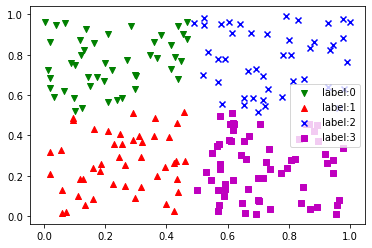

In [8]:
data = df[df["label"] == 0].values
plt.scatter(data[:,0],data[:,1], color='g',marker='v',label='label:0')
data = df[df["label"] == 1].values
plt.scatter(data[:,0],data[:,1], color='r',marker='^',label='label:1')
data = df[df["label"] == 2].values
plt.scatter(data[:,0],data[:,1], color='b',marker='x',label='label:2')
data = df[df["label"] == 3].values
plt.scatter(data[:,0],data[:,1], color='m',marker='s',label='label:3')
plt.legend()
plt.show()